In [140]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

In [3]:
countries = pd.read_csv('raw/country_codes')
countries.columns = ['Country', 'country_name']

In [130]:
sex_dict = {1:'Male', 2:'Female', 9:'Unspecified'}

In [4]:
df = pd.concat([pd.read_csv('raw/Morticd10_part1', low_memory=False),
                pd.read_csv('raw/Morticd10_part2', low_memory=False)])
df = df.merge(countries, 'left')
df.shape

(3767064, 40)

In [194]:
df_au = df.query('country_name == "Australia"')
df_au.shape

(63845, 40)

In [195]:
skin_cancer_au = df_au[df_au.Cause.str.contains('^C4[34].')]

In [196]:
skin_cancer_au.reset_index(drop=True, inplace=True)

In [197]:
col_dict = {'Deaths1':'All ages', 'Deaths25':'95+ years', 'Deaths26':'Unspecified'}
for i in range(2,7): col_dict[f'Deaths{i}'] = f'{i-2} years'
for i in range(1,19): col_dict[f'Deaths{i+6}'] = f'{i*5}-{(i+1)*5 - 1} years'

In [198]:
skin_cancer_au.rename(col_dict, axis=1, inplace=True)

In [208]:
resume = skin_cancer_au[['country_name', 'Year', 'Sex', 'Cause'] + list(col_dict.values())].copy()

In [217]:
resume = resume.melt(id_vars=['country_name','Year','Sex','Cause'], var_name='Age', value_name='n')

In [224]:
resume = resume.groupby(['country_name','Year','Sex','Age'])['n'].sum().reset_index()

In [234]:
resume.Sex = resume.Sex.map(sex_dict)

In [236]:
resume.head()

,country_name,Year,Sex,Age,n
0,Australia,1998,Male,0 years,0.0
1,Australia,1998,Male,1 years,0.0
2,Australia,1998,Male,10-14 years,0.0
3,Australia,1998,Male,15-19 years,0.0
4,Australia,1998,Male,2 years,0.0


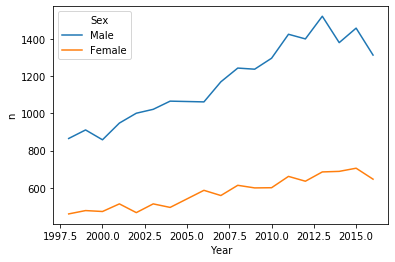

In [235]:
sns.lineplot('Year', 'n', hue='Sex', data=resume.query('Age == "All ages"'))

In [237]:
resume.to_csv('../src/skin_cancer_au.csv', index=False)

# ---